In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import tensorflow as tf
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
import matplotlib.font_manager as fm 

font_fname = 'C:/Windows/Fonts/Malgun.ttf' #적용할 폰트
font_family = fm.FontProperties(fname=font_fname).get_name() #폰트 설정
plt.rcParams["font.family"] = font_family  #폰트 적용

In [3]:
# 부호 오류 고치기 코드
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
os.chdir(r"C:\Users\user\project\2021 빅데이터 경진대회\최종")

In [6]:
comp_1_one=pd.read_csv('KBV공작_concattt.csv')

TRAIN_SPLIT = 53280

<AxesSubplot:>

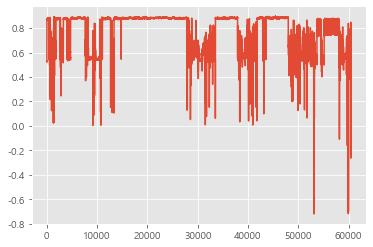

In [7]:
comp_1_one['역률평균'].plot()

In [8]:
comp_1_one.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
comp_1_one['TIMESTAMP'] = pd.to_datetime(comp_1_one['TIME'])
comp_1_one.drop('TIME', axis = 1, inplace=True)
comp_1_one.set_index('TIMESTAMP', inplace=True)

In [10]:
comp_1_one

,전류평균,온도,선간전압평균,상전압평균,유효전력평균,누적전력량,역률평균,주파수,전압고조파평균,무효전력평균
TIMESTAMP,,,,,,,,,,
2020-09-16 00:00:00,9.688000,26.875,218.667000,126.167000,1936.25,615574.000,0.526000,59.901000,5.664000,3121.25
2020-09-16 00:01:00,9.667000,26.250,218.000000,125.833000,1940.75,615607.000,0.529000,59.882000,5.697000,3107.50
2020-09-16 00:02:00,9.719000,26.250,218.000000,125.750000,1921.75,615640.000,0.526000,59.873000,5.599000,3098.25
2020-09-16 00:03:00,9.615000,26.250,218.417000,126.000000,1935.50,615673.000,0.527000,59.826000,5.371000,3116.50
2020-09-16 00:04:00,9.677000,26.875,218.333000,125.833000,1932.50,615706.000,0.527000,59.863000,5.404000,3106.25
...,...,...,...,...,...,...,...,...,...,...
2020-10-27 23:55:19,18.208334,16.875,217.916672,125.916664,4332.00,275498.531,0.629468,59.835430,7.421875,5347.50
2020-10-27 23:56:19,18.958334,17.500,218.750000,126.333336,4532.50,275571.500,0.631817,59.835415,7.454427,5560.50
2020-10-27 23:57:19,18.031250,17.500,218.916672,126.416664,4193.00,275644.100,0.614615,59.854070,7.031250,5381.50


In [11]:
X = comp_1_one
X_train = comp_1_one[:53280]
X_test = comp_1_one[53280:]
X_train = X_train[['전류평균', '온도', '유효전력평균', '누적전력량', '주파수', '전압고조파평균','역률평균']]
X_test = X_test[['전류평균', '온도', '유효전력평균', '누적전력량', '주파수', '전압고조파평균', '역률평균']]

In [12]:
from sklearn import preprocessing

# preprocessing.MinMaxScaler()
# preprocessing.StandardScaler()
# preprocessing.RobustScaler()
# preprocessing.Normalizer()

# 1. 스케일러를 선택 후 스케일러 객체를 지정한다
scaler = preprocessing.StandardScaler()

# 2. 스케일러 객체의 fit()함수를 이용하여 필요한 파라미터를 저장한다
# scaler_fit에는 칼럼별 최대와 최소값이 저장되어있다.
scaler_fit = scaler.fit(X)

# 3. 스케일러 객체의 transform()함수를 이용하여 스케일링을 수행한다
result=scaler_fit.transform(X)

In [13]:
def feature_engineering_scaling(scaler, X_train, X_test):
    # scaler파라미터는 아래 4개중 하나를 넣는다
    # preprocessing.MinMaxScaler()
    # preprocessing.StandardScaler()
    # preprocessing.RobustScaler()
    # preprocessing.Normalizer()
    scaler = scaler
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                               index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                               index=X_test.index, columns=X_test.columns)
    return X_train_scaling, X_test_scaling

In [14]:
X_train_scaling, X_test_scaling = feature_engineering_scaling(scaler, X_train, X_test)

In [15]:
X_train_scaling = X_train_scaling[['전류평균', '온도', '유효전력평균', '누적전력량', '주파수', '전압고조파평균', '역률평균']]
X_test_scaling = X_test_scaling[['전류평균', '온도', '유효전력평균', '누적전력량', '주파수', '전압고조파평균', '역률평균']]
y_train = X_train_scaling[['역률평균']]
y_test = X_test_scaling[['역률평균']]
X_train = X_train_scaling[['전류평균', '온도', '유효전력평균', '누적전력량', '주파수', '전압고조파평균']]
X_test = X_test_scaling[['전류평균', '온도', '유효전력평균', '누적전력량', '주파수', '전압고조파평균']]

In [16]:
seasonal_lag = 6

for i in X_train_scaling.columns:
    X_train_scaling[i]=X_train_scaling[i].diff(seasonal_lag)
    
for i in X_test_scaling.columns:
    X_test_scaling[i]=X_test_scaling[i].diff(seasonal_lag)

In [17]:
X_train_scaling = X_train_scaling.dropna()
X_test_scaling = X_test_scaling.dropna()

In [18]:
y_train = X_train_scaling[['역률평균']]
y_test = X_test_scaling[['역률평균']]
X_train = X_train_scaling[['전류평균', '온도', '유효전력평균', '누적전력량', '주파수', '전압고조파평균']]
X_test = X_test_scaling[['전류평균', '온도', '유효전력평균', '누적전력량', '주파수', '전압고조파평균']]

In [16]:
X_train_scaling[:53274]

,전류평균,온도,유효전력평균,누적전력량,주파수,전압고조파평균,역률평균
TIMESTAMP,,,,,,,
2020-09-16 00:00:00,0.947034,1.018342,0.625196,0.338302,1.066855,1.515661,-1.626512
2020-09-16 00:01:00,0.942911,0.870781,0.628920,0.338404,0.469619,1.540574,-1.606032
2020-09-16 00:02:00,0.953121,0.870781,0.613200,0.338506,0.186718,1.466589,-1.626512
2020-09-16 00:03:00,0.932701,0.870781,0.624576,0.338608,-1.290656,1.294460,-1.619685
2020-09-16 00:04:00,0.944874,1.018342,0.622094,0.338710,-0.127617,1.319373,-1.619685
...,...,...,...,...,...,...,...
2020-10-22 23:49:19,2.523862,-1.195069,2.175468,-1.421466,-1.580598,2.007213,-1.315087
2020-10-22 23:50:19,2.521817,-1.195069,2.241657,-1.421257,0.179079,2.007213,-1.271989
2020-10-22 23:51:19,2.331604,-1.195069,2.371553,-1.421085,-2.751999,2.031788,-0.846523


In [37]:
X_test_scaling

,전류평균,온도,유효전력평균,누적전력량,주파수,전압고조파평균,역률평균
TIMESTAMP,,,,,,,
2020-10-23 00:00:19,1.771192,-1.195069,1.188838,-1.419806,-0.701592,2.228391,-1.846676
2020-10-23 00:01:19,1.718014,-1.342630,1.160707,-1.419664,0.472857,2.179240,-1.821526
2020-10-23 00:02:19,1.726195,-1.195069,1.177875,-1.419530,-2.166393,2.179240,-1.794943
2020-10-23 00:03:19,1.732331,-1.490190,1.152640,-1.419397,-0.114352,2.056364,-1.815539
2020-10-23 00:04:19,1.711878,-1.342630,1.143126,-1.419265,0.765785,2.056364,-1.833535
...,...,...,...,...,...,...,...
2020-10-27 23:55:19,2.619992,-1.342630,2.607351,-0.712398,-0.994238,2.842773,-0.920156
2020-10-27 23:56:19,2.767253,-1.195069,2.773238,-0.712172,-0.994710,2.867348,-0.904120
2020-10-27 23:57:19,2.585221,-1.195069,2.492348,-0.711948,-0.408318,2.547869,-1.021555


In [17]:
from pycaret.regression import *

clf = setup(data = X_train_scaling, target = '역률평균', train_size = 0.8, session_id = 6)

,Description,Value
0,session_id,6
1,Target,역률평균
2,Original Data,"(53280, 7)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(42624, 6)"


In [18]:
best5models = compare_models(sort = 'RMSE', n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0203,0.0067,0.0805,0.9933,0.0308,0.0353,4.9590
rf,Random Forest Regressor,0.0202,0.0071,0.0810,0.9929,0.0322,0.0345,9.5470
gbr,Gradient Boosting Regressor,0.0391,0.0085,0.0913,0.9915,0.0406,0.0583,11.3690
lightgbm,Light Gradient Boosting Machine,0.0297,0.0087,0.0918,0.9913,0.0357,0.0482,3.2840
dt,Decision Tree Regressor,0.0264,0.0119,0.1053,0.9881,0.0415,0.0499,0.2320
knn,K Neighbors Regressor,0.0418,0.0162,0.1251,0.9838,0.0482,0.0608,0.2520
ada,AdaBoost Regressor,0.1241,0.0527,0.2289,0.9474,0.1122,0.2748,1.0650
lr,Linear Regression,0.4321,0.3755,0.6113,0.6252,0.2933,0.7887,3.4830
ridge,Ridge Regression,0.4321,0.3755,0.6113,0.6252,0.2933,0.7888,0.0370
br,Bayesian Ridge,0.4321,0.3755,0.6113,0.6252,0.2934,0.7888,0.0370


In [19]:
best5models

[ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=6, verbose=0, warm_start=False),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=6, verbose=0, warm_start=False),
 GradientBoos

In [20]:
et = create_model('et', fold = 5, cross_validation = True)
rf = create_model('rf', fold = 5, cross_validation = True)
gbr = create_model('gbr', fold = 5, cross_validation = True)
lh = create_model('lightgbm', fold = 5, cross_validation = True)
dt = create_model('dt', fold = 5, cross_validation = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0281,0.0190,0.1379,0.9811,0.0475,0.0396
1,0.0266,0.0090,0.0949,0.9911,0.0430,0.0531
2,0.0279,0.0123,0.1111,0.9876,0.0443,0.0463
3,0.0279,0.0142,0.1193,0.9857,0.0444,0.0789
4,0.0254,0.0075,0.0866,0.9925,0.0382,0.0344
Mean,0.0272,0.0124,0.1100,0.9876,0.0435,0.0505
SD,0.0010,0.0041,0.0181,0.0040,0.0030,0.0155


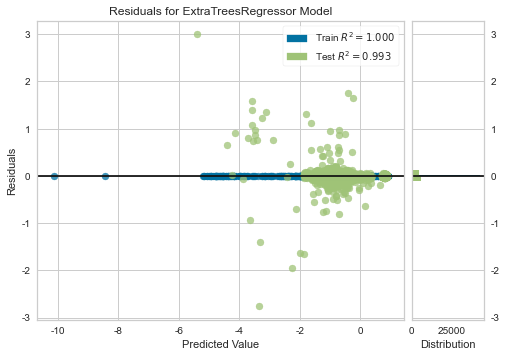

In [21]:
plot_model(et)

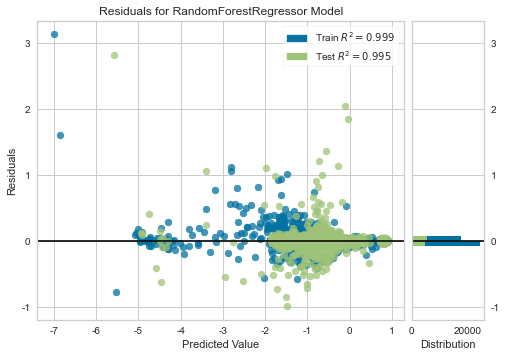

In [22]:
plot_model(rf)

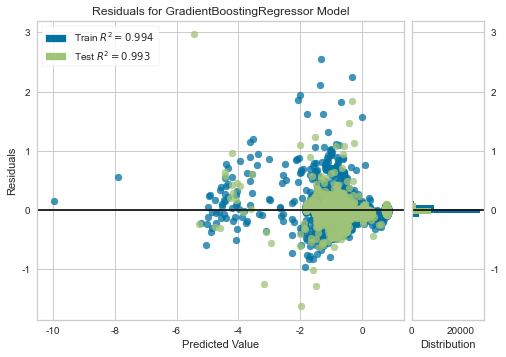

In [23]:
plot_model(gbr)

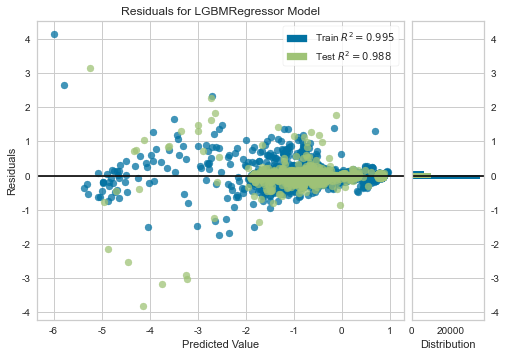

In [24]:
plot_model(lh)

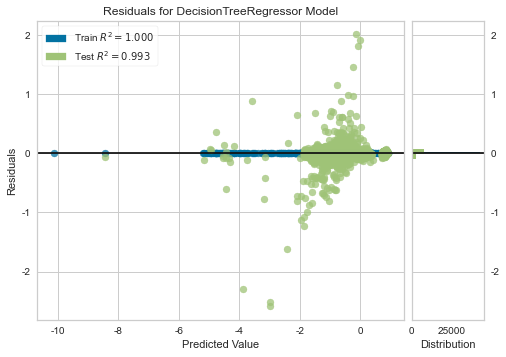

In [25]:
plot_model(dt)

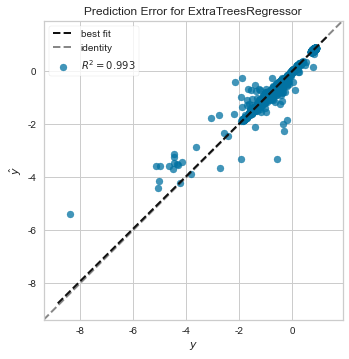

In [26]:
plot_model(et, plot='error')

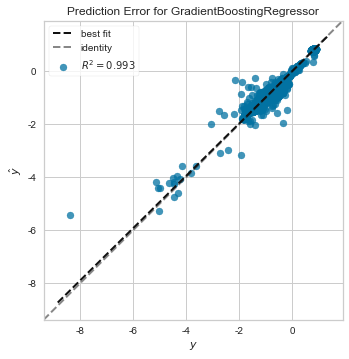

In [27]:
plot_model(gbr, plot='error')

In [28]:
final_model = finalize_model(et)
pred = predict_model(final_model, data = X_test)

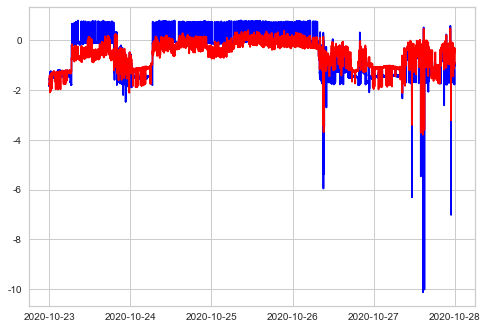

In [29]:
plt.plot(X_test_scaling.index, X_test_scaling['역률평균'],color = 'blue')
plt.plot(X_test_scaling.index, pred['Label'], color = 'red')

In [30]:
final_model = finalize_model(gbr)
pred = predict_model(final_model, data = X_test)

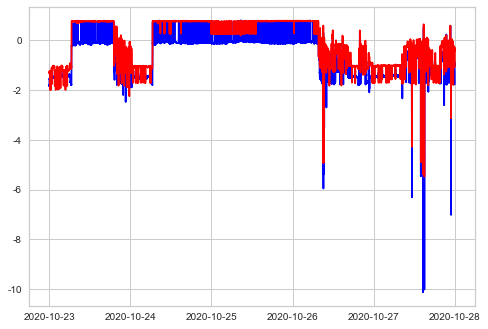

In [31]:
plt.plot(X_test_scaling.index, X_test_scaling['역률평균'],color = 'blue')
plt.plot(X_test_scaling.index, pred['Label'], color = 'red')

In [32]:
# 모델 블렌딩

blender_specific = blend_models(estimator_list = [rf,gbr,lh], optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0281,0.0129,0.1136,0.9871,0.0341,0.0415
1,0.0281,0.0063,0.0791,0.9938,0.0352,0.0433
2,0.0259,0.0045,0.0670,0.9955,0.0304,0.0455
3,0.0265,0.0037,0.0612,0.9963,0.0295,0.0406
4,0.0277,0.0079,0.0890,0.9920,0.0356,0.0401
5,0.0271,0.0053,0.0728,0.9947,0.0351,0.0525
6,0.0280,0.0109,0.1046,0.9893,0.0336,0.0412
7,0.0250,0.0043,0.0655,0.9956,0.0312,0.0404
8,0.0261,0.0060,0.0774,0.9939,0.0314,0.0432
9,0.0264,0.0045,0.0671,0.9956,0.0308,0.0358


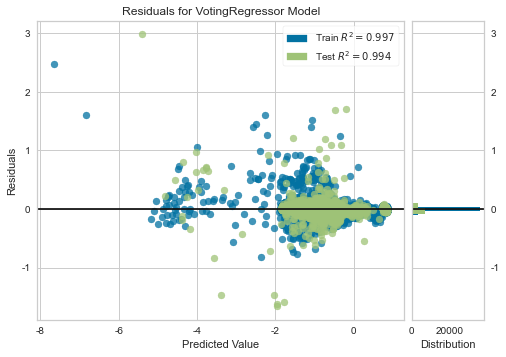

In [33]:
plot_model(blender_specific)

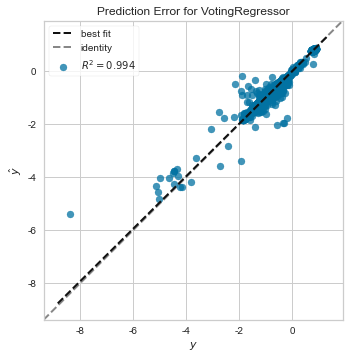

In [34]:
plot_model(blender_specific, plot='error')

In [35]:
final_model = finalize_model(blender_specific)
pred = predict_model(final_model, data = X_test)

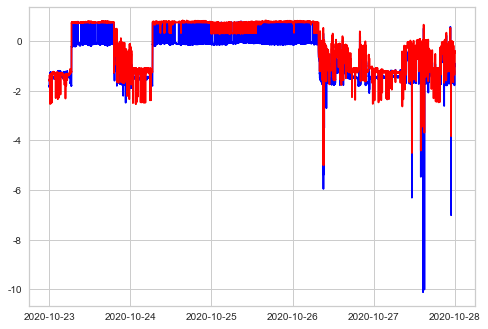

In [36]:
plt.plot(X_test_scaling.index, X_test_scaling['역률평균'],color = 'blue')
plt.plot(X_test_scaling.index, pred['Label'], color = 'red')